In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
plt.xkcd()
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font",family=font_name)
seoul=gpd.read_file('seoul.json')

In [6]:
서울=pd.read_excel("전체_정리파일.xlsx",sheet_name="서울_구단위(최종)")["환자"]
전국=pd.read_excel("전체_정리파일.xlsx",sheet_name="전국(최종)")["환자"]

In [7]:
서울

0      0.254753
1      0.596578
2      0.848055
3      0.577806
4      0.414812
5      0.182432
6      0.385767
7      0.811641
8      0.762399
9      0.695543
10     0.763290
11     1.051267
12     0.497388
13     1.094060
14     0.330818
15     1.015314
16     1.100514
17     1.195010
18     1.781798
19     1.631171
20     0.911633
21     2.735364
22     0.827704
23     1.964715
24     1.269466
25     1.495470
26     2.291291
27     1.685100
28     0.911926
29     1.276813
         ...   
738    0.176643
739    0.489328
740    0.256826
741    0.393235
742    0.425172
743    0.140929
744    0.273593
745    0.510108
746    0.441928
747    0.435423
748    0.428027
749    0.000000
750    0.304178
751    0.211518
752    0.273982
753    0.613779
754    0.265153
755    0.326923
756    0.342279
757    0.196745
758    0.426613
759    0.211697
760    0.548342
761    0.409704
762    0.176666
763    0.654518
764    0.427867
765    0.590797
766    0.488342
767    0.353347
Name: 환자, Length: 768, d

In [3]:
for j in range(1):
    언제야 = "머양{}".format(j)
    생 = .iloc[:,j]
    발=[]
    for i in 생:
        발.append(round(i,2))
    #강동구,송파구
    a1,a2=발[0],발[1]
    #강남구,@서초구
    b1,b2=발[2],발[3]
    #@관악구,@금천구,동작구
    c1,c2,c3=발[4],발[5],발[6]
    #강서구,구로구,양천구,영등포구
    d1,d2,d3,d4=발[7],발[8],발[9],발[10]
    #마포구,@서대문구,@은평구
    e1,e2,e3=발[11],발[12],발[13]
    #용산구,@종로구,중구
    f1,f2,f3=발[14],발[15],발[16]
    #@강북구,노원구,@도봉구,성북구
    g1,g2,g3,g4=발[17],발[18],발[19],발[20]
    #@광진구,동대문구,성동구,@중랑구
    h1,h2,h3,h4=발[21],발[22],발[23],발[24]

    votes={'dummy1':0,'dum2':1,            
        '도봉구':g3,'은평구':e3,'동대문구':h2,
        '동작구':c3,'금천구':c2,'구로구':d2,
        '종로구':f2,'강북구':g1,'중랑구':h4,
        '강남구':b1,'강서구':d1,'중구':f3,
        '강동구':a1,'광진구':h1,'마포구':e1,
        '관악구':c1,'서초구':b2,'성북구':g4,
        '노원구':g2,'송파구':a2,'성동구':h3,
        '서대문구':e2,'양천구':d3,'영등포구':d4,'용산구':f1}

    votes_df = pd.DataFrame(list(votes.items()), columns = ["SIG_KOR_NM", 'percent'])
    data_result=pd.merge(seoul,votes_df,on='SIG_KOR_NM')
    data_result["sum"] = data_result["SIG_KOR_NM"].map(str) +' \n '+ data_result["percent"].map(str)
    final_pic=data_result.plot( figsize=(18,15),linewidth=0.25, edgecolor='white',
                               column='percent',cmap=plt.cm.get_cmap('rainbow', 25),legend=True,)
    for index,row in data_result.iterrows():
        xy=row['geometry'].centroid.coords[:]
        xytext=row['geometry'].centroid.coords[:]
        plt.annotate(row['sum'],xy=xy[0], xytext=xytext[0],
                     horizontalalignment='center',verticalalignment='center')
        plt.axis('off')
    plt.title("서울특별시 A형간염 구별 발생자 수 비교 \n [Min_Max_Scaler]no.{}".format(j),
              fontsize=20)
    #plt.show()
    

NameError: name '뎃따' is not defined

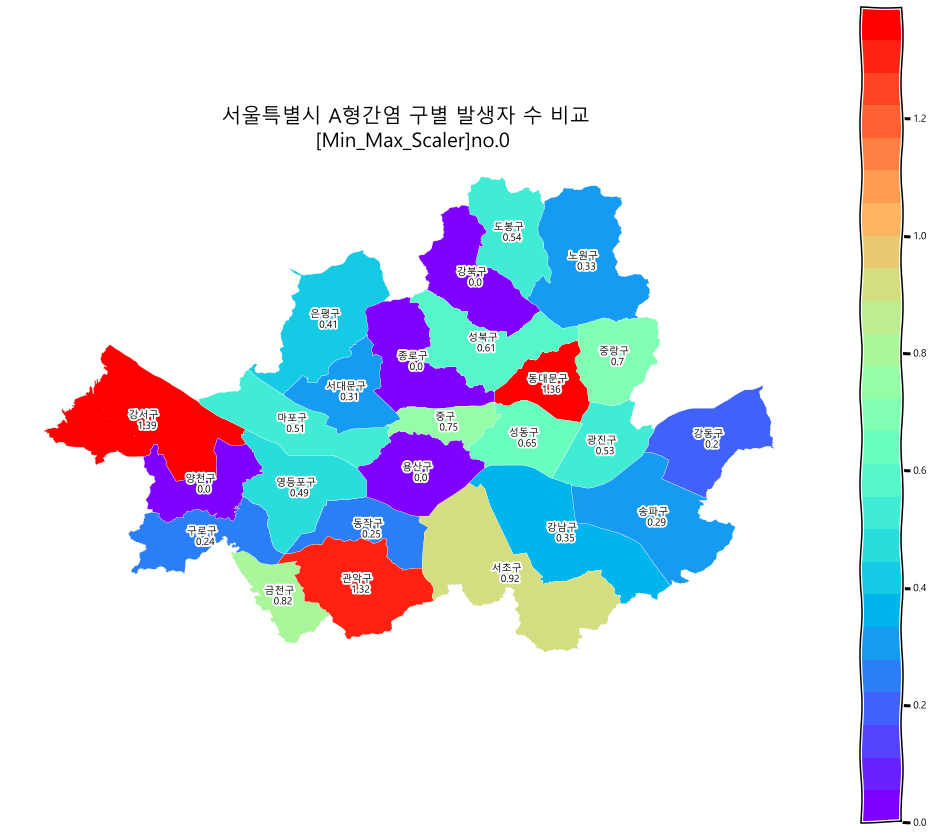

In [23]:
    seoul_fig=final_pic.get_figure()
    seoul_fig.savefig('./히힝/두번째_1115서asdsd울구_{}'.format(언제야),transparent=True)

In [131]:
# from PIL import Image
# im=Image.open('C:/Users/dhrtj/Desktop/seoui_map.png')
# cropImage=im.crop((150,220,1180,880))
# cropImage.save('C:/Users/dhrtj/Desktop/cropped_seoul.png',transparent=True)

In [62]:
# data= pd.read_excel("실제발생량.xlsx")
# 생 = data.iloc[:,1]
# 발=[]
# for i in 생:
#     발.append(round(i,2))
# #강동구,송파구
# a1,a2=발[0],발[1]
# #강남구,@서초구
# b1,b2=발[2],발[3]
# #@관악구,@금천구,동작구
# c1,c2,c3=발[4],발[5],발[6]
# #강서구,구로구,양천구,영등포구
# d1,d2,d3,d4=발[7],발[8],발[9],발[10]
# #마포구,@서대문구,@은평구
# e1,e2,e3=발[11],발[12],발[13]
# #용산구,@종로구,중구
# f1,f2,f3=발[14],발[15],발[16]
# #@강북구,노원구,@도봉구,성북구
# g1,g2,g3,g4=발[17],발[18],발[19],발[20]
# #@광진구,동대문구,성동구,@중랑구
# h1,h2,h3,h4=발[21],발[22],발[23],발[24]

# votes={            
#     '도봉구':g3,'은평구':e3,'동대문구':h2,
#     '동작구':c3,'금천구':c2,'구로구':d2,
#     '종로구':f2,'강북구':g1,'중랑구':h4,
#     '강남구':b1,'강서구':d1,'중구':f3,
#     '강동구':a1,'광진구':h1,'마포구':e1,
#     '관악구':c1,'서초구':b2,'성북구':g4,
#     '노원구':g2,'송파구':a2,'성동구':h3,
#     '서대문구':e2,'양천구':d3,'영등포구':d4,'용산구':f1}

# votes_df = pd.DataFrame(list(votes.items()), columns = ["SIG_KOR_NM", 'percent'])
# data_result=pd.merge(seoul,votes_df,on='SIG_KOR_NM')
# data_result["sum"] = data_result["SIG_KOR_NM"].map(str) +' \n '+ data_result["percent"].map(str)
# final_pic=data_result.plot( figsize=(18,15),linewidth=0.25, edgecolor='white',
#                            column='percent',cmap='Reds',legend=True)
# for index,row in data_result.iterrows():
#     xy=row['geometry'].centroid.coords[:]
#     xytext=row['geometry'].centroid.coords[:]
#     plt.annotate(row['sum'],xy=xy[0], xytext=xytext[0],
#                  horizontalalignment='center',verticalalignment='center')
#     plt.axis('off')
# plt.show()
# seoul_fig=final_pic.get_figure()
# seoul_fig.savefig('seoul_map.png',transparent=True)